In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
covid_start_date = '02-01-2020'

In [5]:
df = pd.read_csv('USMAP2014.csv')

In [6]:
df

,Unnamed: 0,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,United States,2015,3
1,1,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,2015,4
2,2,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,United States,2015,3
3,3,89,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia,2015,1
4,4,108,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070164,6278815,5,22074.0,Avon Jet AG,MFE,"Mission/McAllen/Edinburg, TX",TX,Texas,US,United States,VCE,"Venice, Italy",NaN,NaN,IT,Italy,2020,3
2070165,6278816,2,22074.0,Avon Jet AG,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,FAB,"Farnborough, United Kingdom",NaN,NaN,GB,United Kingdom,2020,3
2070166,6278817,6,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,ATH,"Athens, Greece",NaN,NaN,GR,Greece,2020,7
2070167,6278818,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany,2020,10


In [5]:
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + "-01")                           

In [26]:
df_passengers_before_pandemic = df[df.YEAR < 2020].groupby('YEAR_MONTH').sum().reset_index()#[['YEAR', 'Sum_PASSENGERS']]

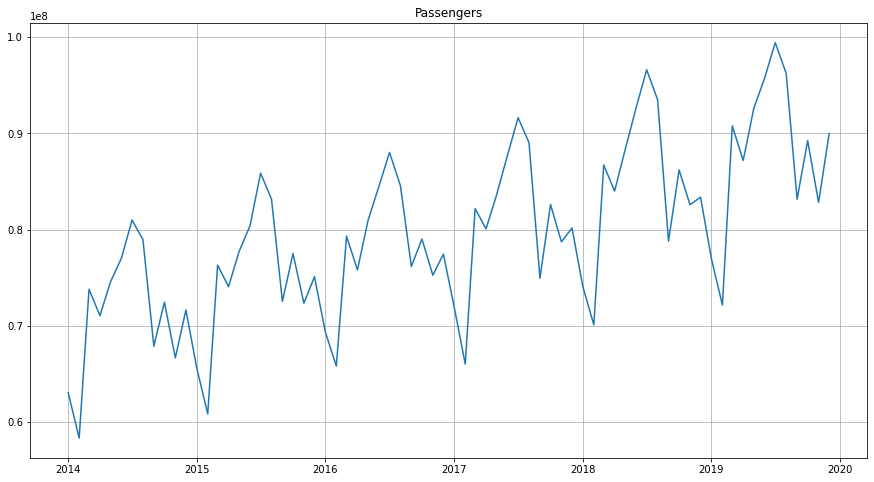

In [27]:
plt.figure(figsize=(15,8))
plt.plot(df_passengers_before_pandemic.YEAR_MONTH, df_passengers_before_pandemic.Sum_PASSENGERS)
plt.grid(True)
plt.title('Passengers')
plt.show()

In [28]:
df_flight_count_before_pandemic = df[df.YEAR < 2020].groupby('YEAR_MONTH').count().reset_index()#[['YEAR', 'Sum_PASSENGERS']]

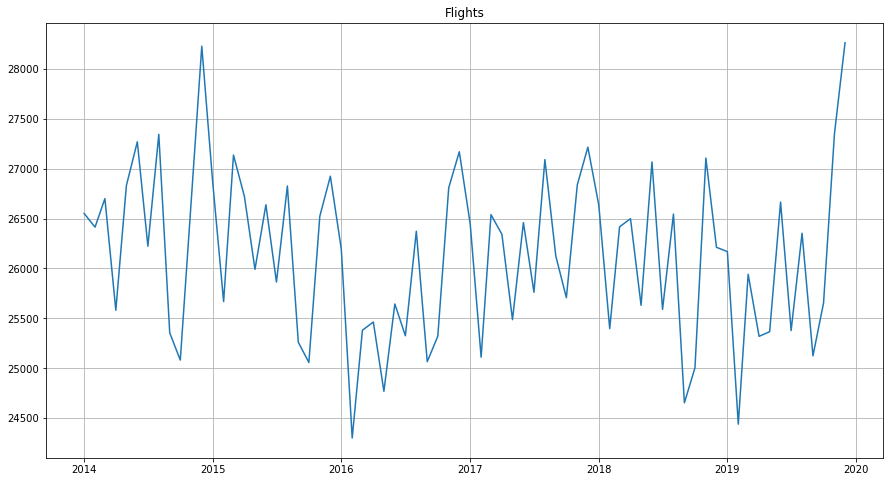

In [30]:
plt.figure(figsize=(15,8))
plt.plot(df_flight_count_before_pandemic.YEAR_MONTH, df_flight_count_before_pandemic.AIRLINE_ID)
plt.grid(True)
plt.title('Flights')
plt.show()

In [6]:
df_passengers = df.groupby('YEAR_MONTH').sum().reset_index()#[['YEAR', 'Sum_PASSENGERS']]

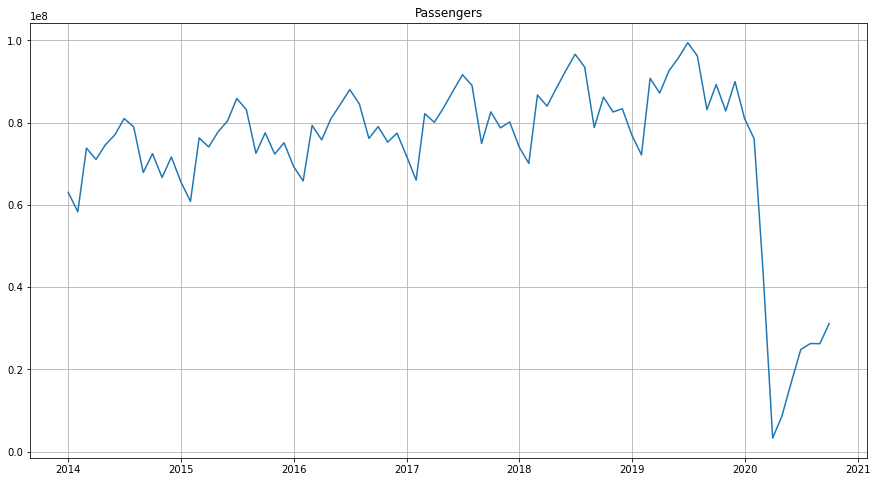

In [24]:
plt.figure(figsize=(15,8))
plt.plot(df_passengers.YEAR_MONTH, df_passengers.Sum_PASSENGERS)
plt.grid(True)
plt.title('Passengers')
plt.show()

In [8]:
df_flight_count = df.groupby('YEAR_MONTH').count().reset_index()#[['YEAR', 'Sum_PASSENGERS']]

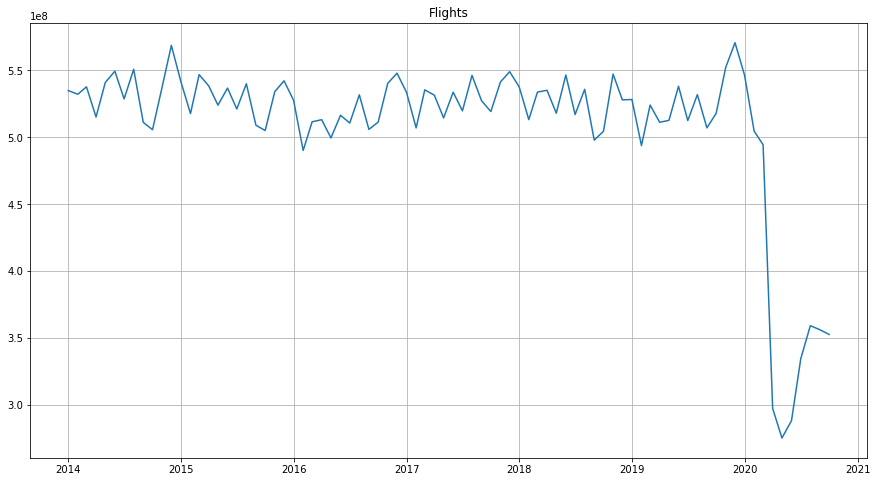

In [31]:
plt.figure(figsize=(15,8))
plt.plot(df_passengers.YEAR_MONTH, df_passengers.AIRLINE_ID)
plt.grid(True)
plt.title('Flights')
plt.show()

In [10]:
df_routes_pre_covid = df[df.YEAR_MONTH < covid_start_date].groupby(['ORIGIN', 'DEST']).sum().reset_index()
df_routes_pst_covid = df[df.YEAR_MONTH >= covid_start_date].groupby(['ORIGIN', 'DEST']).sum().reset_index()

In [32]:
# Routes popular before Covid-19
df_routes_pre_covid.sort_values('Sum_PASSENGERS', ascending=False).head(10)[['ORIGIN', 'DEST', 'Sum_PASSENGERS']].style.hide_index()

ORIGIN,DEST,Sum_PASSENGERS
LAX,SFO,11204365
SFO,LAX,11057491
LAX,JFK,10313691
JFK,LAX,10211575
LGA,ORD,9150873
ORD,LGA,9112482
JFK,LHR,8850232
LHR,JFK,8847286
ATL,MCO,8477581
MCO,ATL,8454717


In [33]:
# Routes popular after Covid-19
df_routes_pst_covid.sort_values('Sum_PASSENGERS', ascending=False).head(10)[['ORIGIN', 'DEST', 'Sum_PASSENGERS']].style.hide_index()

ORIGIN,DEST,Sum_PASSENGERS
LAX,DFW,471814
DFW,LAX,471410
PHX,DEN,421857
DEN,PHX,416872
FLL,ATL,409619
ATL,FLL,395884
ORD,LAX,395597
LAX,ORD,393972
MCO,ATL,386679
ATL,MCO,378679


In [13]:
## Carriers

In [14]:
df_carriers_pre_covid = df[(df.YEAR_MONTH > '04-01-2019') & (df.YEAR_MONTH < covid_start_date)].groupby(['CARRIER_NAME']).count()#.reset_index()[['CARRIER_NAME', 'AIRLINE_ID']]
df_carriers_pst_covid = df[df.YEAR_MONTH >= covid_start_date].groupby(['CARRIER_NAME']).count()#.reset_index()[['CARRIER_NAME', 'AIRLINE_ID']]

In [15]:
df_carriers_pre_pst_join = df_carriers_pre_covid.join(df_carriers_pst_covid, on='CARRIER_NAME', lsuffix="_pre", rsuffix="_post")

In [16]:
df_carriers_pre_pst_join['DIFF'] = (df_carriers_pre_pst_join['AIRLINE_ID_pre'] - df_carriers_pre_pst_join['AIRLINE_ID_post'])
df_carriers_pre_pst_join['DIFF_PERC'] = (df_carriers_pre_pst_join['AIRLINE_ID_pre'] - df_carriers_pre_pst_join['AIRLINE_ID_post']) / df_carriers_pre_pst_join['AIRLINE_ID_pre']

In [17]:
# Airlines affected the worst
df_carriers_pre_pst_join.sort_values('DIFF_PERC', ascending=False)[['AIRLINE_ID_pre', 'AIRLINE_ID_post', 'DIFF', 'DIFF_PERC']].head()

,AIRLINE_ID_pre,AIRLINE_ID_post,DIFF,DIFF_PERC
CARRIER_NAME,,,,
XTRA Airways,74,1.0,73.0,0.986486
"Pacific Airways, Inc.",155,6.0,149.0,0.961290
"Corvus Airlines, Inc d/b/a Era Aviation d/b/a Ravn Alaska",1034,46.0,988.0,0.955513
Hong Kong Airlines Limited,42,2.0,40.0,0.952381
JetClub AG,19,1.0,18.0,0.947368
